## Технологии разведочного анализа и обработки данных.
Саркисян Стелла ИУ5-61Б

In [220]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style="ticks")

In [242]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv', sep=",")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [244]:
data.shape

(500, 9)

In [223]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Искусственное создание данных, необходимых для решения задачи.

Так как в данном наборе данных отсутствуют пропуски, заменим часть значений в двух признаках на пропуски. Также в датасете отсутствуют категориальные признаки, поэтому создадим категориальный признак на основе числового признака 'Research'.

In [224]:
data['Research'].unique()

array([1, 0])

In [245]:
data.loc[data['Research']==1,'Research']='Yes'
data.loc[data['Research']==0,'Research']='No'

/var/folders/1m/wkflr0r52lv_mmhp0ry35gx40000gn/T/ipykernel_2031/3513629266.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Yes' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['Research']==1,'Research']='Yes'


In [226]:
data.loc[data['SOP']==4.5,'SOP']=None
for i in range(500):
    a=np.random.randint(1,6)
    if a==2:
        data.at[i,'Research']=None

In [227]:
data.isnull().sum()

Serial No.             0
GRE Score              0
TOEFL Score            0
University Rating      0
SOP                   63
LOR                    0
CGPA                   0
Research             100
Chance of Admit        0
dtype: int64

### Обработка пропусков в данных.

In [228]:
from sklearn.impute import SimpleImputer

In [229]:
strategies=['mean', 'median','most_frequent']

In [230]:
data_SOP = data[['SOP']]
data_SOP

,SOP
0,NaN
1,4.0
2,3.0
3,3.5
4,2.0
...,...
495,NaN
496,5.0
497,NaN
498,4.0


In [231]:
# Заполнение средними значениями
imp_num = SimpleImputer(strategy=strategies[0])
data_num_imp = imp_num.fit_transform(data_SOP)
data['SOP'] = data_num_imp

In [232]:
data_Research = data[['Research']]
data_Research

,Research
0,Yes
1,Yes
2,Yes
3,None
4,No
...,...
495,Yes
496,Yes
497,None
498,No


In [233]:
# Заполнение наиболее частыми значениями
most_common_value = data['Research'].mode()[0]
data['Research'] = np.where(data['Research'].isnull(), most_common_value, data['Research'])

In [234]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Подготовили данные, проведя обработку пропусков в данных. 
Для построения моделей машинного обучения с данным набором данных, можно использовать следующие признаки:

- GRE Scores: Отражает академическую подготовку кандидата.
- TOEFL Scores: Важен для международных студентов, отражает способность к английскому языку.
- Undergraduate GPA: Показывает академическую успеваемость.
- Research Experience: Бинарный признак, отражает наличие опыта исследований.
- Chance of Admit: Целевая переменная для предсказания шансов на поступление.

Эти признаки были выбраны на основе их потенциальной значимости. Они отражают различные аспекты академической подготовки и способности кандидатов, которые могут влиять на их шансы на поступление.

### Диаграмма рассеяния

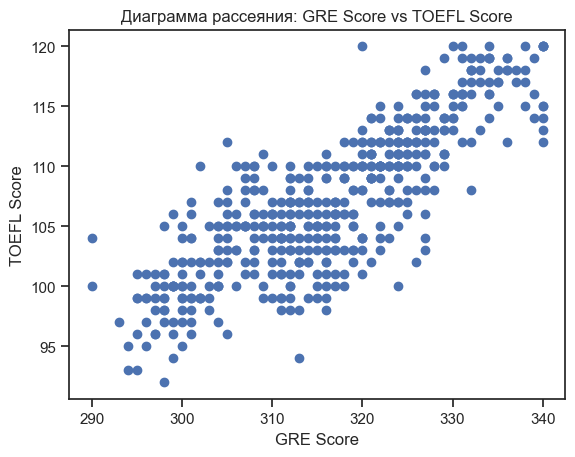

In [240]:
plt.scatter(data['GRE Score'], data['TOEFL Score'])

plt.title('Диаграмма рассеяния: GRE Score vs TOEFL Score')
plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score')

plt.show()